In [57]:
import cv2

from functions import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import skimage
import ast

# Image Segmentation

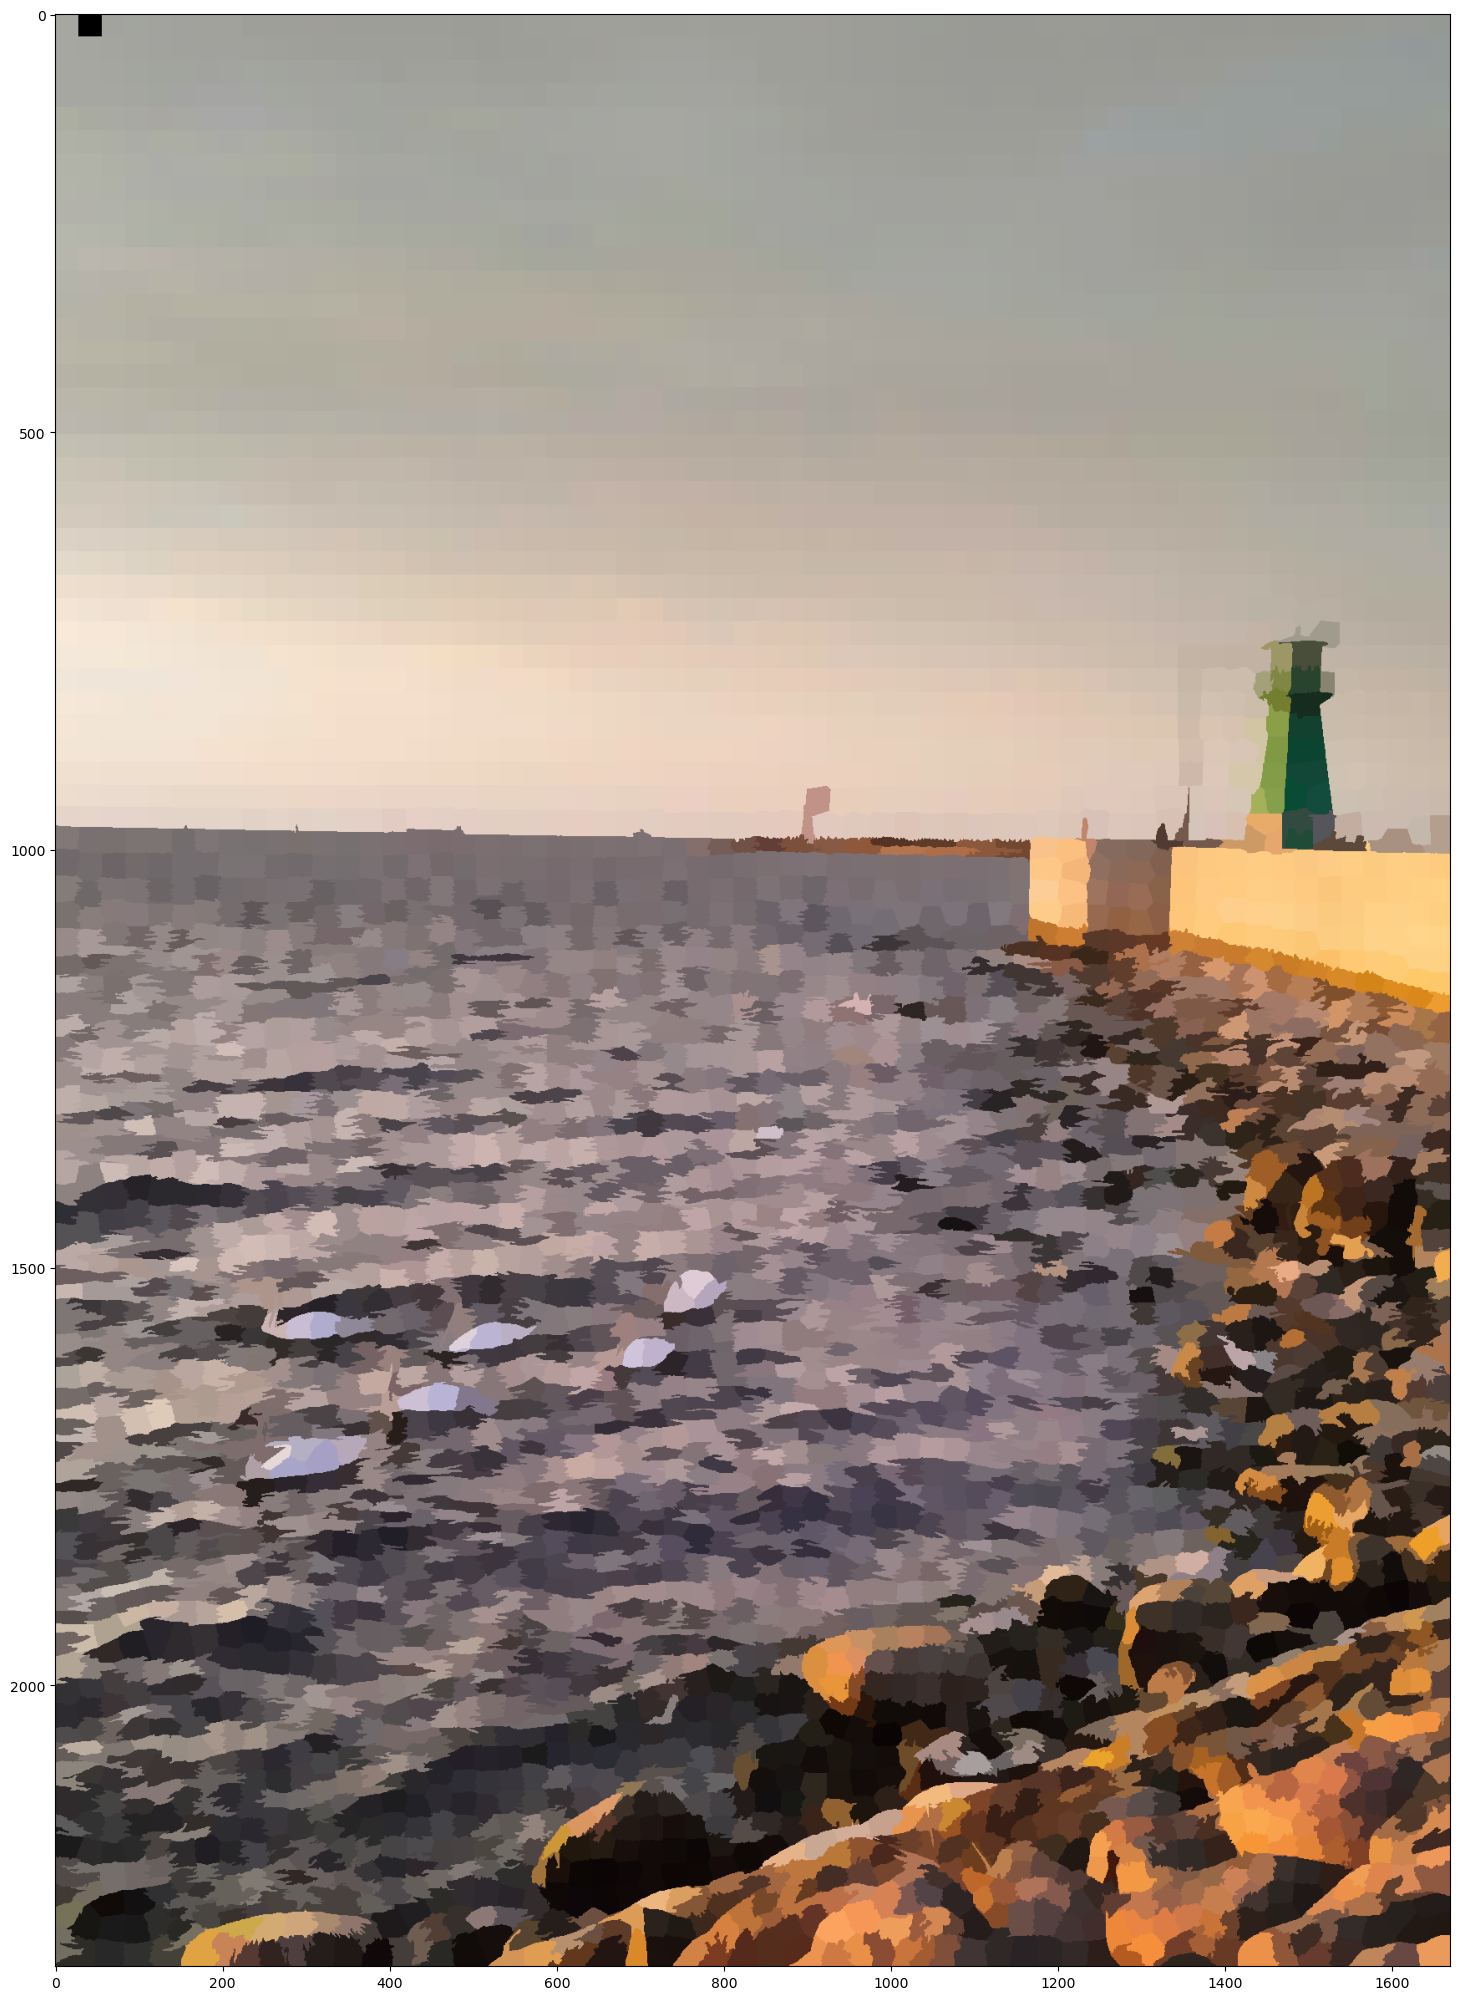

In [336]:
path = "../images/labedzie_edited.jpg"
img = load_image(path)
out = segment_image(img, n_segments=5000, squared=30)

plt.figure(figsize=(18, 32))
plt.imshow(out)
plt.show()

# K-Means Clustering

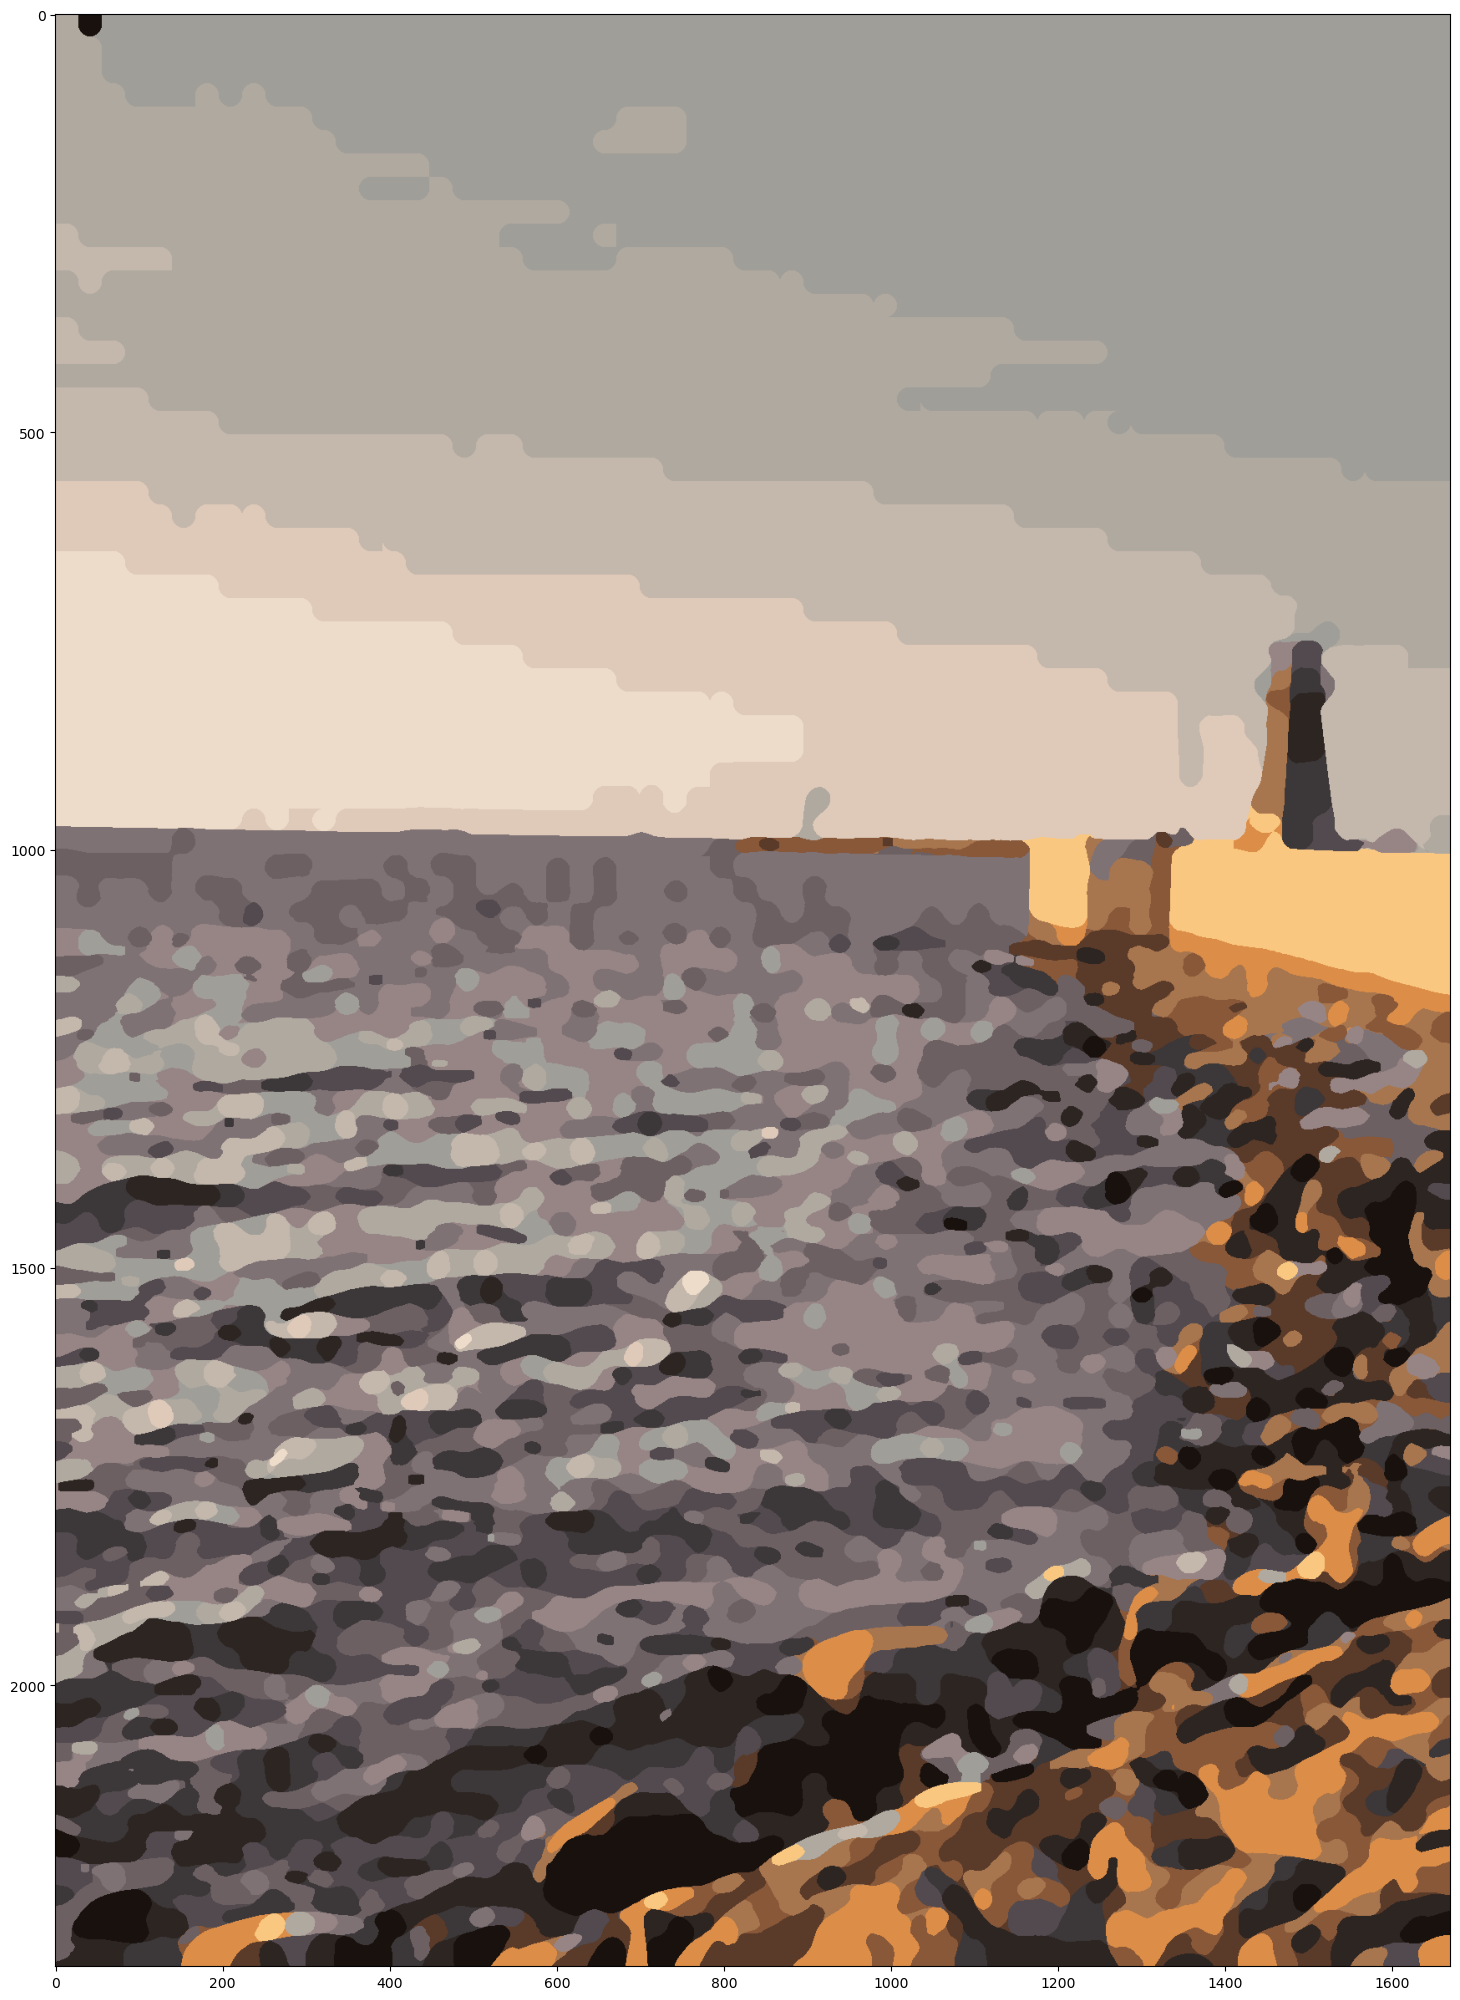

In [337]:
result_image = perform_kmeans_clustering(out, k=17, blur=True, blur_effect=21, save=True)

plt.figure(figsize=(18, 32))
plt.imshow(result_image)
plt.show()

# Create Borders & Add Numbers

In [338]:
import numpy as np
import cv2

def add_numbers_to_borders(kmeans_image, colors):
    # Prepare the image for drawing (convert single channel mask to BGR if necessary)
    finished = False
    borders_with_numbers = np.ones_like(kmeans_image) * 255

    for i, color in enumerate(colors):
        # Create a mask for the current color
        mask = cv2.inRange(kmeans_image, color, color)
        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            # Calculate the distance transform of the binary image within the contour
            mask_contour = np.zeros_like(mask)
            cv2.drawContours(borders_with_numbers, [contour], 0, (0,0,0), thickness=1)
            cv2.drawContours(mask_contour, [contour], 0, 255, thickness=cv2.FILLED)
            dist_transform = cv2.distanceTransform(mask_contour, cv2.DIST_L2, 3)

            # Find the indices of the maximum value in the distance transform
            max_idx = np.unravel_index(np.argmax(dist_transform), dist_transform.shape)

            # Center of the largest inscribed circle
            cx, cy = max_idx[::-1]  # Reverse the order for (x, y)

            # Adjust text size based on the radius
            max_val = dist_transform[max_idx]
            font_scale = min(max_val / 40, 1)  # Adjust font size based on distance, but limit to a maximum

            # Define text and font
            text = f"{i}"
            font = cv2.FONT_HERSHEY_SIMPLEX
            font_color = (0, 0, 0)  # white text

            # Place text at the circle's center
            text_size = cv2.getTextSize(text, font, font_scale, 1)[0]
            text_x = max(10, min(cx - text_size[0] // 2, borders_with_numbers.shape[1] - text_size[0]))
            text_y = max(text_size[1] + 10, min(cy + text_size[1] // 2, borders_with_numbers.shape[0]))
            saved_x = text_x
            saved_y = text_y
            # Boundary checks for text_x and text_y
            # if text_x <= 50 or text_x >= (mask.shape[1] - 50) or text_y <= 50 or text_y >= (mask.shape[0] - 50):
            cv2.putText(borders_with_numbers, text, (text_x, text_y), font, font_scale, font_color, 1, cv2.LINE_AA)
            # else:
            #     #try:
            #     #     while not (mask[text_y - 1][text_x - 1] == 255 and 
            #     #                mask[text_y + text_size[1] - 1 - 1][text_x - 1] == 255 and 
            #     #                mask[text_y - 1][text_x + text_size[0] - 1 - 1] == 255 and
            #     #                mask[text_y + text_size[1] - 1 - 1][text_x + text_size[0] - 1 - 1] == 255):
            #     #         text_x += 5
            #     #         text_y += 5
            #     #         
            #     # except IndexError:
            #     #     text_x = saved_x
            #     #     text_y = saved_y
            #     # 
            #     # try:
            #     #     while not (mask[text_y - 1][text_x - 1] == 255 and 
            #     #                mask[text_y + text_size[1] - 1 - 1][text_x - 1] == 255 and 
            #     #                mask[text_y - 1][text_x + text_size[0] - 1 - 1] == 255 and
            #     #                mask[text_y + text_size[1] - 1 - 1][text_x + text_size[0] - 1 - 1] == 255):
            #     #         text_x += 5
            #     #         text_y -= 5
            #     # 
            #     # except IndexError:
            #     #     text_x = saved_x
            #     #     text_y = saved_y
            #     # 
            #     # try:
            #     #     while not (mask[text_y - 1][text_x - 1] == 255 and 
            #     #                mask[text_y + text_size[1] - 1 - 1][text_x - 1] == 255 and 
            #     #                mask[text_y - 1][text_x + text_size[0] - 1 - 1] == 255 and
            #     #                mask[text_y + text_size[1] - 1 - 1][text_x + text_size[0] - 1 - 1] == 255):
            #     #         text_x -= 5
            #     #         text_y += 5
            #     # 
            #     # except IndexError:
            #     #     text_x = saved_x
            #     #     text_y = saved_y
            #     
            #     try:
            #         while not (mask[text_y - 1][text_x - 1] == 255 and 
            #                    mask[text_y + text_size[1] - 1 - 1][text_x - 1] == 255 and 
            #                    mask[text_y - 1][text_x + text_size[0] - 1 - 1] == 255 and
            #                    mask[text_y + text_size[1] - 1 - 1][text_x + text_size[0] - 1 - 1] == 255):
            #             text_x -= 5
            #             text_y -= 5
            #             
            #     except IndexError:
            #         text_x = saved_x
            #         text_y = saved_y
            #     
            #     try:
            #         while not (mask[text_y - 1][text_x - 1] == 255 and 
            #                    mask[text_y + text_size[1] - 1 - 1][text_x - 1] == 255 and 
            #                    mask[text_y - 1][text_x + text_size[0] - 1 - 1] == 255 and
            #                    mask[text_y + text_size[1] - 1 - 1][text_x + text_size[0] - 1 - 1] == 255):
            #             text_x += 1
            #             
            #     except IndexError:
            #         text_x = saved_x
            #         text_y = saved_y
            #         
            #     try:
            #         while not (mask[text_y - 1][text_x - 1] == 255 and 
            #                    mask[text_y + text_size[1] - 1 - 1][text_x - 1] == 255 and 
            #                    mask[text_y - 1][text_x + text_size[0] - 1 - 1] == 255 and
            #                    mask[text_y + text_size[1] - 1 - 1][text_x + text_size[0] - 1 - 1] == 255):
            #             text_x -= 1
            #             
            #     except IndexError:
            #         text_x = saved_x
            #         text_y = saved_y
            #         
            #     try:
            #         while not (mask[text_y - 1][text_x - 1] == 255 and 
            #                    mask[text_y + text_size[1] - 1 - 1][text_x - 1] == 255 and 
            #                    mask[text_y - 1][text_x + text_size[0] - 1 - 1] == 255 and
            #                    mask[text_y + text_size[1] - 1 - 1][text_x + text_size[0] - 1 - 1] == 255):
            #             text_y += 1
            #             
            #     except IndexError:
            #         text_x = saved_x
            #         text_y = saved_y
            # 
            #     try:
            #         while not (mask[text_y - 1][text_x - 1] == 255 and 
            #                    mask[text_y + text_size[1] - 1 - 1][text_x - 1] == 255 and 
            #                    mask[text_y - 1][text_x + text_size[0] - 1 - 1] == 255 and
            #                    mask[text_y + text_size[1] - 1 - 1][text_x + text_size[0] - 1 - 1] == 255):
            #             text_y -= 1
            #             
            #     except IndexError:
            #         text_x = saved_x
            #         text_y = saved_y
            #     
            #     cv2.putText(borders_with_numbers, text, (text_x, text_y), font, font_scale, font_color, 1, cv2.LINE_AA)

    return borders_with_numbers


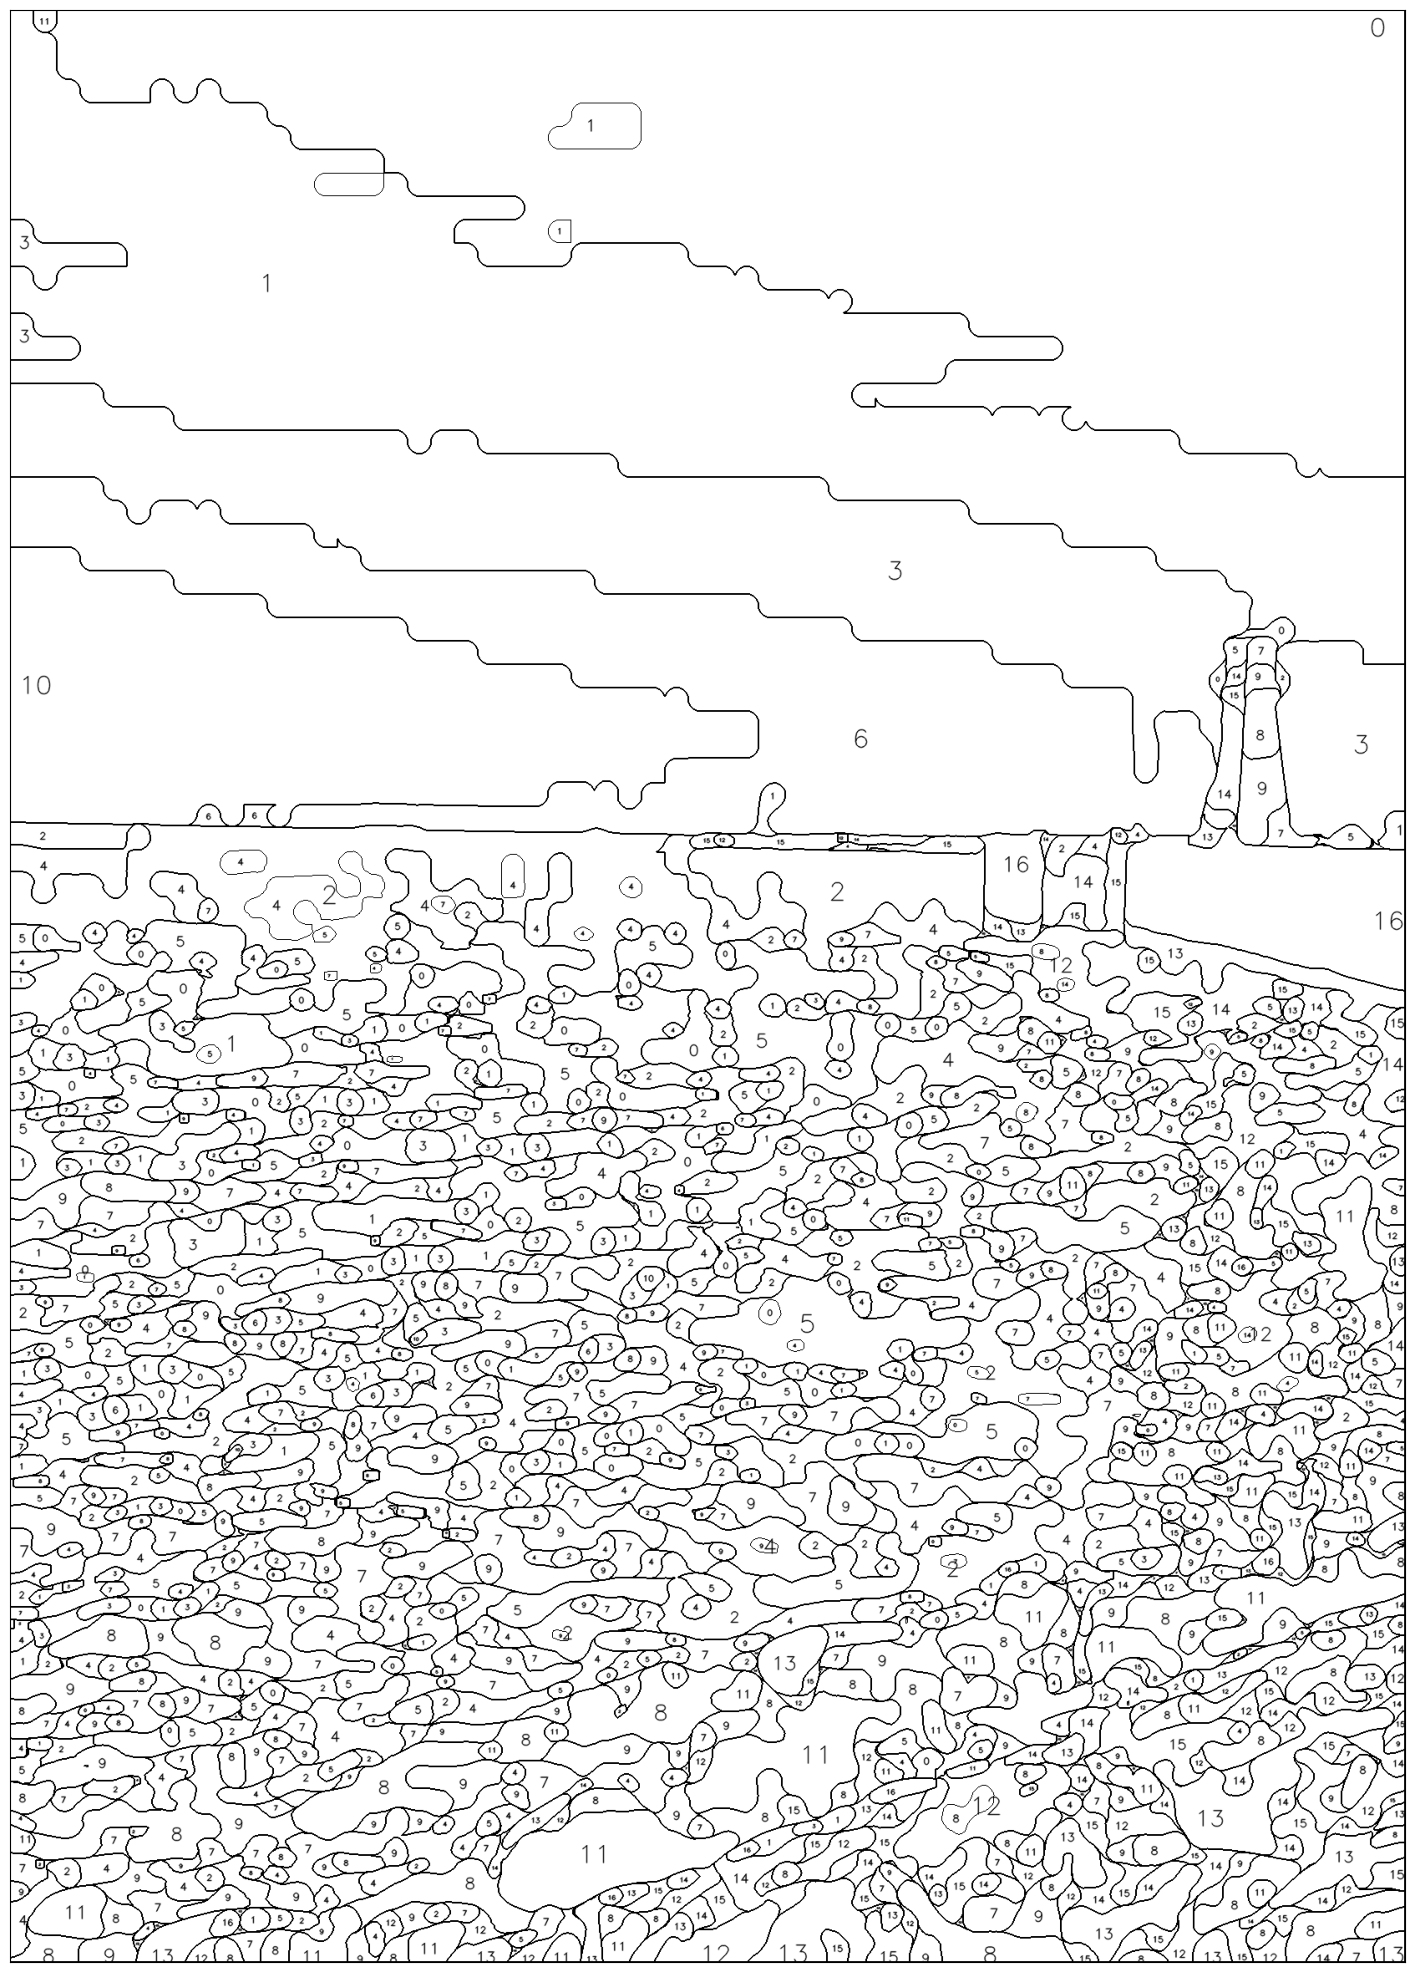

In [339]:
image_colors = return_colors(result_image)

borders_with_numbers = add_numbers_to_borders(result_image, image_colors)

plt.figure(figsize=(18, 32))
plt.imshow(borders_with_numbers)
plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
plt.savefig('labedzie.pdf', bbox_inches='tight', pad_inches=0.02)
plt.show()

# Testing Colors

In [340]:
paints = pd.read_csv("paints.csv")
paint_names = np.array(paints['paint_name'])
paint_rgbs = np.array([ast.literal_eval(rgb) for rgb in paints['rgb']])

In [341]:
closest_paint_colors = find_closest_colors(image_colors)
image_paints = return_paint_names(closest_paint_colors)
print(return_paint_names(closest_paint_colors))

['F8', 'X3', 'F5', 'D8', 'A4', 'X4', 'N8', 'A1', 'F1', '&1', 'I9', 'G1', 'D1', 'Y5', 'R5', 'I1', 'L6']


In [342]:
# Find the closest paint colors to the image colors
closest_paint_colors = find_closest_colors(image_colors)
print(f'Unique colors: {len(np.unique(closest_paint_colors, axis=0))}')

for i, color in enumerate(closest_paint_colors):
    print(
        f"Closest paint color to image color {image_colors[i]} is {color} = {paint_names[np.where((paint_rgbs == color).all(axis=1))][0]}")


Unique colors: 17
Closest paint color to image color [160 158 153] is [160 160 158] = F8
Closest paint color to image color [176 169 160] is [172 162 162] = X3
Closest paint color to image color [127 114 117] is [116 122 127] = F5
Closest paint color to image color [196 183 171] is [201 183 176] = D8
Closest paint color to image color [108  96  99] is [115  91  94] = A4
Closest paint color to image color [151 133 134] is [157 146 142] = X4
Closest paint color to image color [223 202 185] is [221 203 185] = N8
Closest paint color to image color [82 74 78] is [86 64 80] = A1
Closest paint color to image color [45 37 34] is [18 22 23] = F1
Closest paint color to image color [60 55 56] is [61 64 68] = &1
Closest paint color to image color [238 220 202] is [237 213 199] = I9
Closest paint color to image color [24 17 13] is [12 26 46] = G1
Closest paint color to image color [90 58 41] is [79 49 39] = D1
Closest paint color to image color [220 141  71] is [209 144  61] = Y5
Closest paint colo

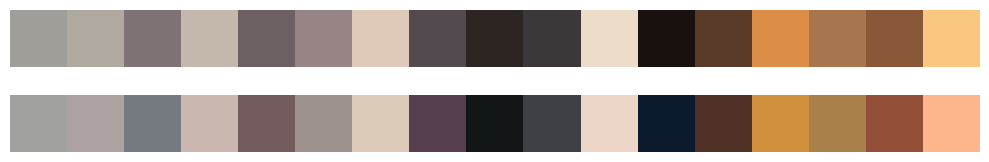

In [343]:
n = len(image_colors)

cmap_original = np.reshape(np.array(image_colors), (1, n, 3))
cmap_paints = np.reshape(np.array(closest_paint_colors), (1, n, 3))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 2), facecolor='white', gridspec_kw={'hspace': 0}, layout="tight")

ax1.imshow(cmap_original)
ax2.imshow(cmap_paints)

ax1.axis('off')
ax2.axis('off')

#plt.savefig('hehe.jpg')
plt.show()

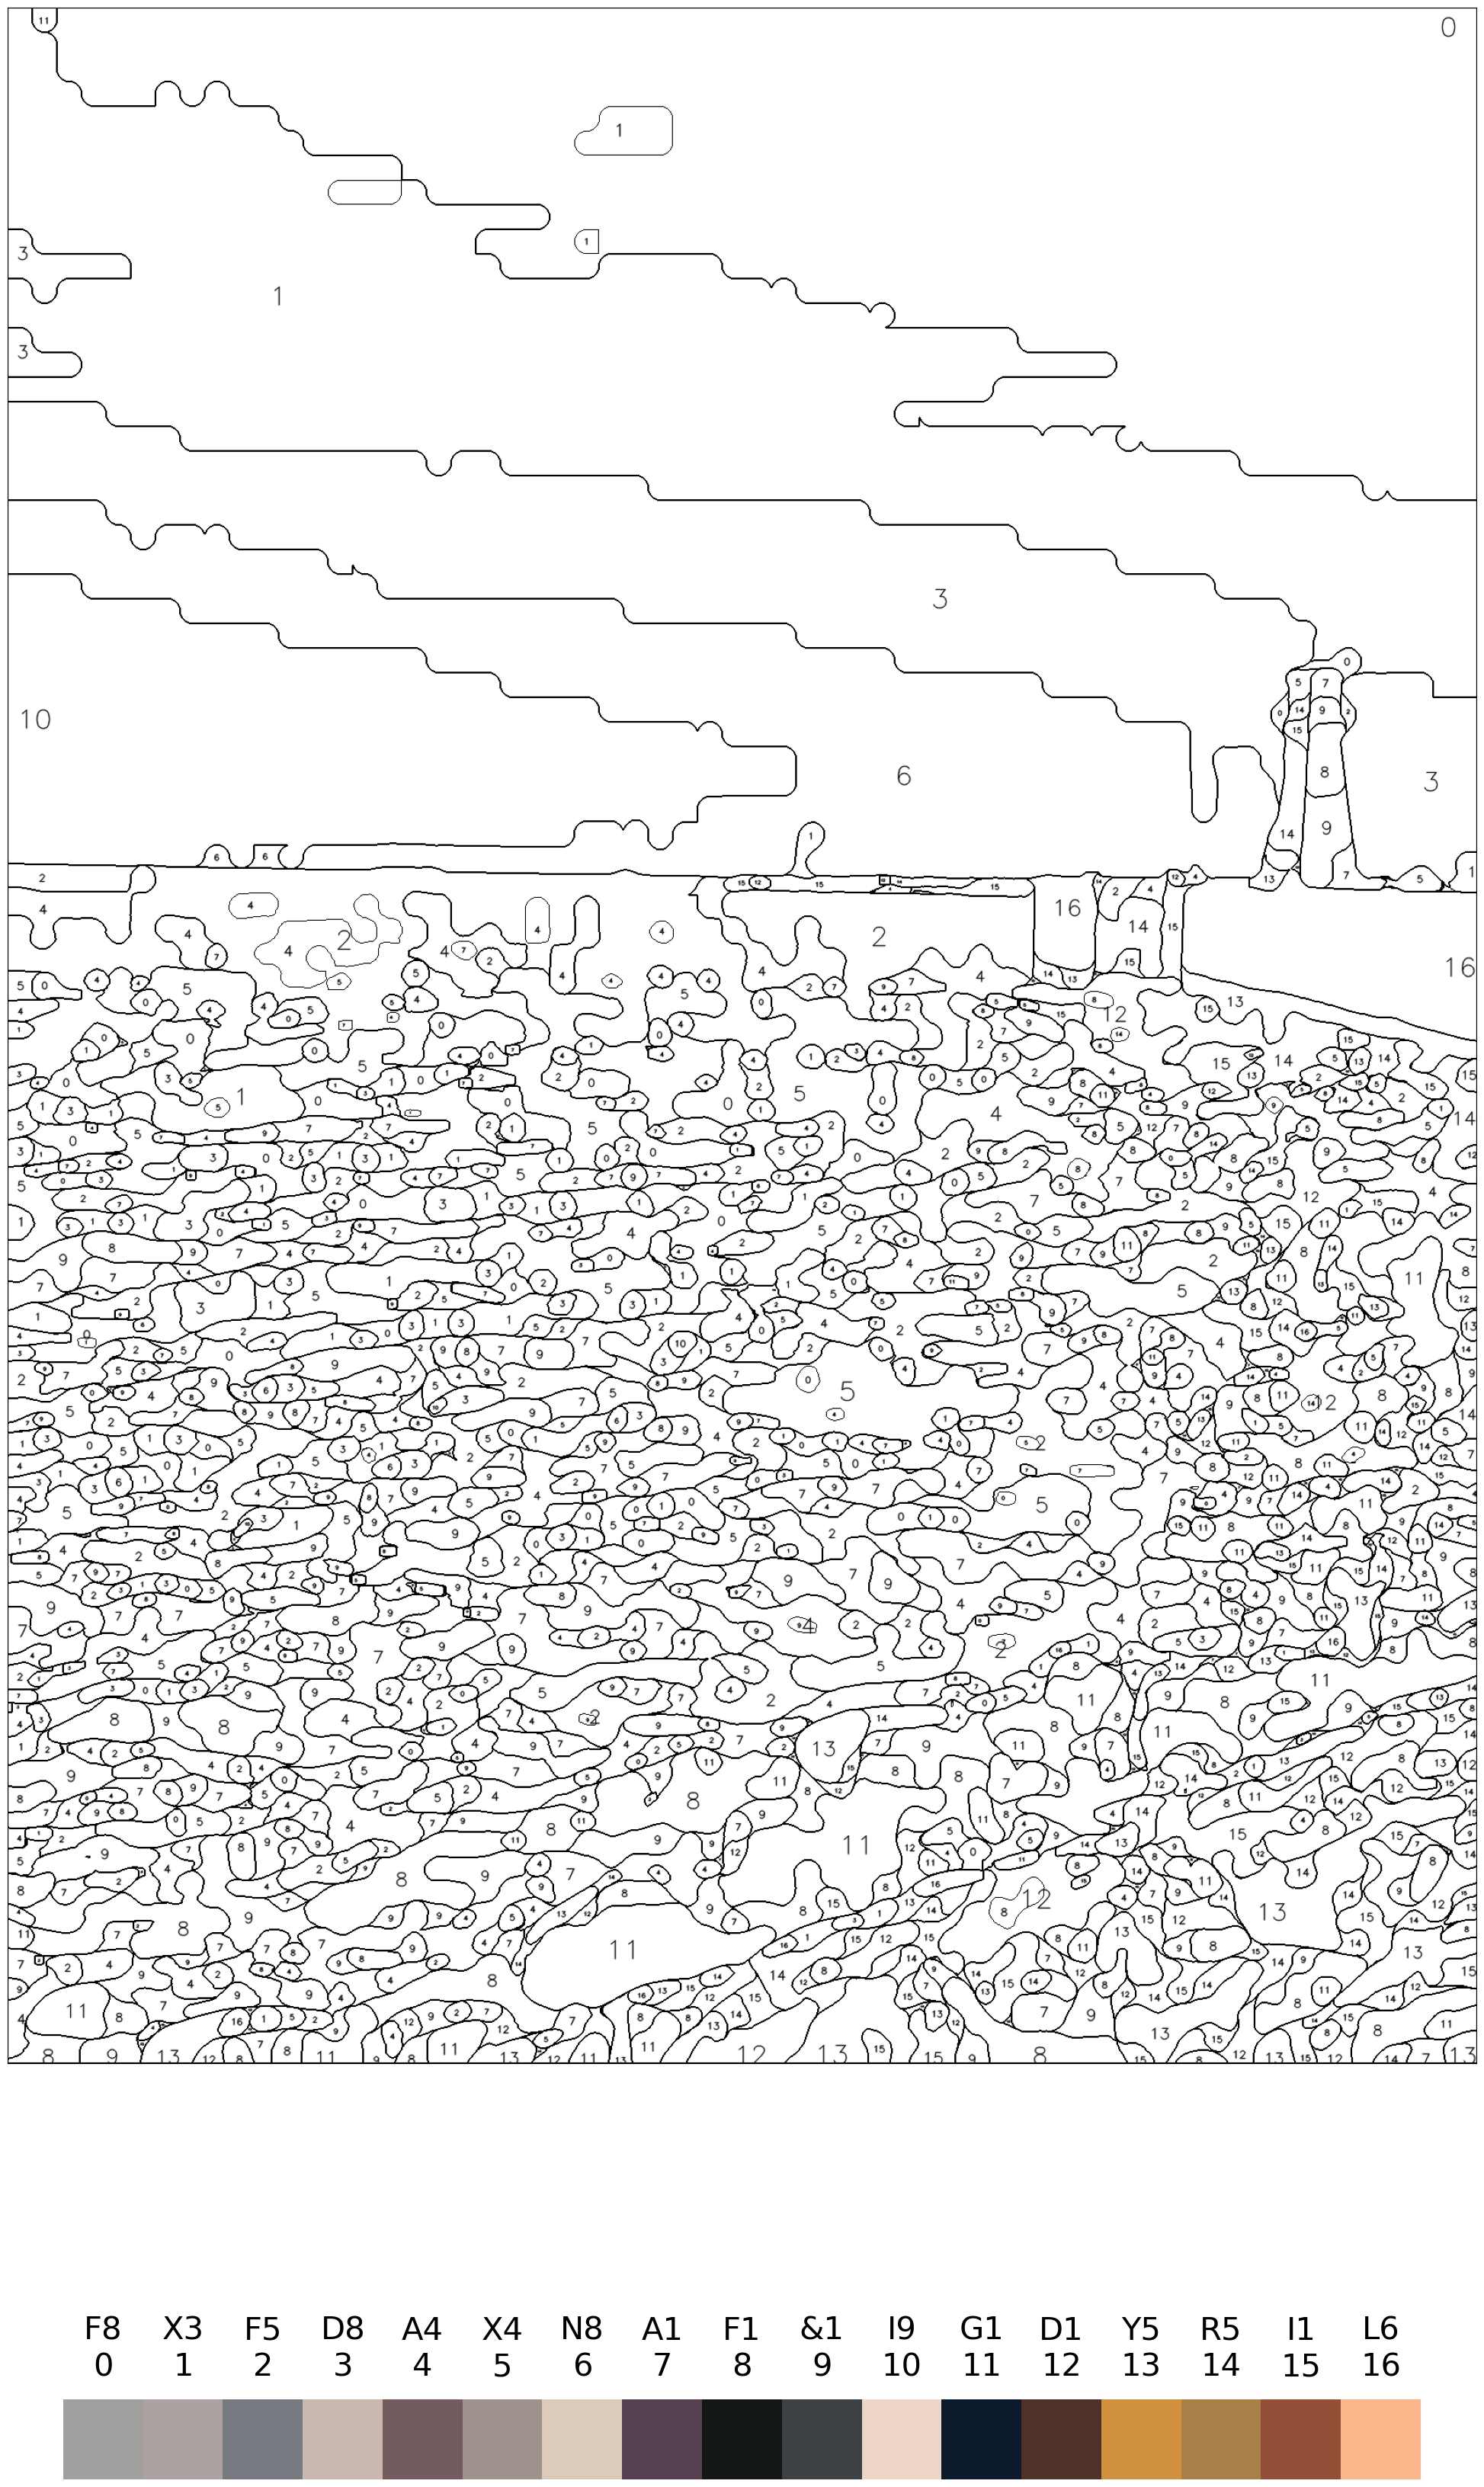

In [344]:
fig, axs = plt.subplot_mosaic("A;B", gridspec_kw={'height_ratios': [10,0.3]},figsize=(20,37))

fig.tight_layout()
xticks = (np.arange(0, cmap_paints.shape[1]+1,1))
axs["A"].imshow(borders_with_numbers, cmap = 'Greys')
axs["A"].set_xticks([])
axs["A"].set_yticks([])


plt.xticks(range(0,cmap_paints.shape[1]))
axs["B"].imshow(cmap_paints)
for i, xpos in enumerate(axs["B"].get_xticks()):
    axs["B"].text(xpos,-.8, xticks[i], 
            size = 30, ha = 'center')

    axs["B"].text(xpos, -1.25, image_paints[i], 
            size = 30, ha = 'center') 
axs["B"].axis('off')
   
plt.savefig('labedzie_sheet.pdf')